In [13]:
import torch

In [1]:
import pickle

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
import IPython.display as ipd
from scipy.io import wavfile
from scipy import signal

In [4]:
import os
import glob

In [5]:
directory = './LibriTTS/train-clean-100'

In [6]:
folders = list()

for filename in os.listdir(directory):
    # Check if the current item is a file
    if os.path.isdir(os.path.join(directory, filename)):
        # Perform operations on the file
        folders.append(filename)
        
print(folders)

['103', '1034', '1040', '1069', '1081', '1088', '1098', '1116', '118', '1183', '1235', '1246', '125', '1263', '1334', '1355', '1363', '1447', '1455', '150', '1502', '1553', '1578', '1594', '1624', '163', '1737', '1743', '1841', '1867', '1898', '19', '1926', '196', '1963', '1970', '198', '1992', '200', '2002', '2007', '201', '2092', '211', '2136', '2159', '2182', '2196', '226', '2289', '229', '233', '2384', '2391', '2416', '2436', '248', '250', '2514', '2518', '254', '26', '2691', '27', '2764', '2817', '2836', '2843', '289', '2893', '2910', '2911', '2952', '298', '2989', '302', '307', '311', '3112', '3168', '32', '3214', '322', '3235', '3240', '3242', '3259', '332', '3374', '3436', '3440', '3486', '3526', '3607', '3664', '3699', '3723', '374', '3807', '3830', '3857', '3879', '39', '3947', '3982', '3983', '40', '4014', '4018', '403', '405', '4051', '4088', '412', '4137', '4160', '4195', '4214', '426', '4267', '4297', '4340', '4362', '4397', '4406', '4441', '446', '4481', '458', '460', '4

In [7]:
wav_list = list()
text_list = list()

In [8]:
def get_files(file_extension, directory, folders):
    output = list()
    for folder in folders:
        a_dir = f"{directory}/{folder}"
        for filename in os.listdir(a_dir):
            if os.path.isdir(os.path.join(a_dir, filename)):
                b_dir = f"{a_dir}/{filename}"
                output.append(list())
                for file in os.listdir(b_dir):
                    if os.path.isfile(os.path.join(b_dir, file)) and file.endswith(file_extension):
                         output[-1].append(f"{b_dir}/{file}")
    return output

In [9]:
wav_list = get_files('.wav', directory, folders)
txt_list = get_files('.normalized.txt', directory, folders)

In [71]:
wav_list_flt = list()
txt_list_flt = list()

In [72]:
for i, j in zip(wav_list, txt_list):
    for a, b in zip(i, j):
        wav_list_flt.append(a)
        txt_list_flt.append(b)

In [50]:
np_wav_files = list()
sampl = list()

In [51]:
for i, wav in enumerate(wav_list_flt):
    temp_sampl, temp_data = wavfile.read(wav)
    np_wav_files.append(temp_data)
    sampl.append(temp_sampl)
    if i % 500 == 0: print(i)

0
500
1000
1500
2000
2500
3000
3500
4000
4500
5000
5500
6000
6500
7000
7500
8000
8500
9000
9500
10000
10500
11000
11500
12000
12500
13000
13500
14000
14500
15000
15500
16000
16500
17000
17500
18000
18500
19000
19500
20000
20500
21000
21500
22000
22500
23000
23500
24000
24500
25000
25500
26000
26500
27000
27500
28000
28500
29000
29500
30000
30500
31000
31500
32000
32500
33000


In [14]:
file_path = 'np_wavs.pkl'

In [56]:
with open(file_path, 'wb') as file:
    pickle.dump(np_wav_files, file)

In [16]:
def get_pkl(file_path):
    with open(file_path, 'rb') as file:
        loaded_list = pickle.load(file)
    return loaded_list

In [70]:
np_wav_files = get_pkl(file_path)

In [69]:
del np_wav_files

In [76]:
len(np_wav_files)

32763

In [68]:
def cut(np_wav_files, txt_list_flt, treshold):
    c = 0
    for k, wav2 in enumerate(np_wav_files):
        if wav2.shape[0]/24000.0 > float(treshold):
            np_wav_files.pop(k)
            txt_list_flt.pop(k)
            print(f"{wav2.shape[0]/24000.0} > {treshold} => k = {k}")
            
    return np_wav_files, txt_list_flt

In [78]:
len(txt_list_flt)

32732

In [81]:
cut(np_wav_files, txt_list_flt, 20)
pass

In [80]:
spect_wav = list()

In [ ]:
np_txt_files = list()

In [67]:
for txt in txt_list_flt[0:5]:    
    with open(txt, 'r') as file:
        txt_contents = file.read()
        print(txt_contents)

matthew Cuthbert is surprised
In fact, he had looked at twenty very much as he looked at sixty, lacking a little of the grayness.
"But there was a passenger dropped off for you-a little girl.
"It's a boy I've come for.
Maybe they were out of boys of the brand you wanted."


In [64]:
times.sort(reverse=True)

In [ ]:
for i, wav in enumerate(wav_list_flt):
    temp_sampl, temp_data = wavfile.read(wav)
    np_wav_files.append(temp_data)
    sampl.append(temp_sampl)
    if i % 500 == 0: print(i)

In [36]:
samplerate, data = wavfile.read("831_130739_000008_000002.wav")

In [37]:
print("sec " + str(data.shape))

sec (324720,)


In [4]:
print("sec " + str(data.shape[0] / samplerate))
print("samplerate = " + str(samplerate))
print("shape = " + str(data.shape[0]))

sec 13.53
samplerate = 24000
shape = 324720


In [20]:
ipd.Audio("831_130739_000008_000002.wav")

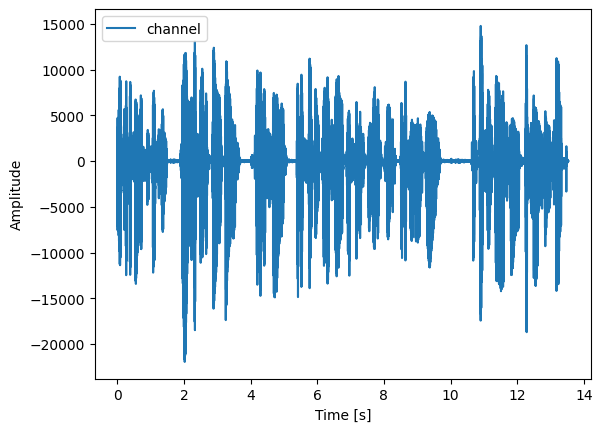

In [5]:
length = data.shape[0] / samplerate
time = np.linspace(0., length, data.shape[0])
plt.plot(time, data, label="channel")
plt.legend()
plt.xlabel("Time [s]")
plt.ylabel("Amplitude")
plt.show()

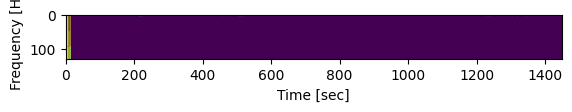

In [13]:
frequencies, times, spectrogram = signal.spectrogram(data, samplerate)

plt.pcolormesh(times, frequencies, np.abs(spectrogram), vmin=0, vmax=(2 * np.sqrt(2)), shading='gouraud')
plt.imshow(spectrogram)
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [sec]')
plt.show()

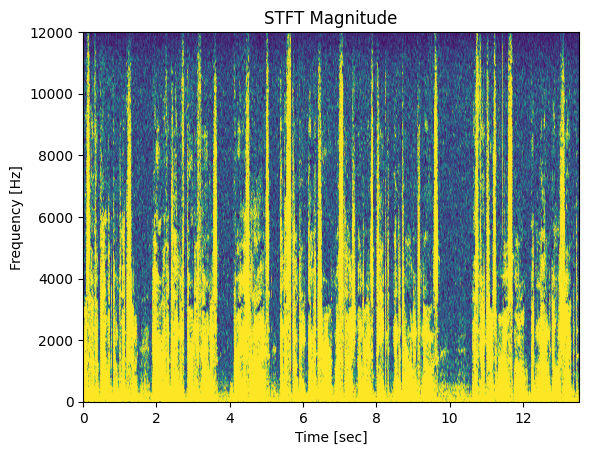

In [6]:
f, t, Zxx = signal.stft(data, samplerate, nperseg=512)
plt.pcolormesh(t, f, np.abs(Zxx), vmin=0, vmax=(2 * np.sqrt(2)), shading='gouraud')
plt.title('STFT Magnitude')
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [sec]')
plt.show()

In [9]:
print(Zxx.shape)
print(spectrogram.shape)

(257, 1270)
(129, 1449)


In [77]:
print(f.shape)

(257,)


In [82]:
print("test")

test
